In [1]:
'''
 Problem Statement:

Must-Have:

Identify and extract actionable insights that can inform business decisions.
Group similar data points, uncovering patterns and relationships within the dataset.
Good to Have: Develop and implement a classification model based on the analysed data, aiming to categorize new case data in an appropriate priority effectively and efficiently.

Students are expected to solve the given problem using the provided dataset and shall submit the result via email by 23rd July, 6pm. in jupyter notebook  (.ipynb) format.

 '''

'\nCongratulations for successfully completing and clearing the online test, we would like to take you ahead in the process.\n\nThe next step is to submit the result, the dataset is a part of technical interview.\n\nPlease find attached the csv file containing the data for the below mentioned problem statement.\n\n Problem Statement:\n\nMust-Have:\n\nIdentify and extract actionable insights that can inform business decisions.\nGroup similar data points, uncovering patterns and relationships within the dataset.\nGood to Have: Develop and implement a classification model based on the analysed data, aiming to categorize new case data in an appropriate priority effectively and efficiently.\n\nStudents are expected to solve the given problem using the provided dataset and shall submit the result via email by 23rd July, 6pm. in jupyter notebook  (.ipynb) format.\n\n '

In [2]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-3ue31rkv
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-3ue31rkv
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit e5b1f0710cb1ea5ebbc73d30abe8d45a07cbb399
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7623 sha256=ed1f7ad329d5427d0b7ec099e984d6c491f380f4eaa52b3ae118a826d2654be7
  Stored in directory: /tmp/pip-ephem-wheel-cache-57yan4h_/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import preprocess_kgptalkie as ps
import re

## Lodind_data

In [5]:
df = pd.read_csv("DSINTERN 1.csv")

In [6]:
df.head()

,priority,subject,Description
0,2.0,Wireless Mouse suddenly stops working,"Dear Support Team, I've been using the Wireles..."
1,2.0,Problème de connexions IP PBX,"Bonjour, nous rencontrons un problème avec not..."
2,2.0,Problem mit meinem SFX-Netzteil,"Sehr geehrte Damen und Herren, mein SFX-Netzte..."
3,2.0,Invoice Adjustment Request,"Dear Customer Support,\nI recently received my..."
4,2.0,Issue with Arbitrum: UI not loading,"Hello Support Team,\nI've been experiencing an..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   priority     191 non-null    float64
 1   subject      204 non-null    object 
 2   Description  204 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.0+ KB


## Handling_missing_values

In [9]:
df.isnull().sum()

priority       17
subject         4
Description     4
dtype: int64

In [10]:
df['priority'].unique()

array([ 2.,  1.,  3., nan,  5.])

In [11]:
df['priority'].mode()

0    3.0
Name: priority, dtype: float64

In [12]:
df['priority'].median()

2.0

In [13]:
# Fill missing values for 'priority'using mode
df['priority'].fillna(df['priority'].mode()[0], inplace=True)

# Fill missing values for 'subject' and 'Description' with an empty string
df['subject'].fillna('', inplace=True)
df['Description'].fillna('', inplace=True)

## Plot

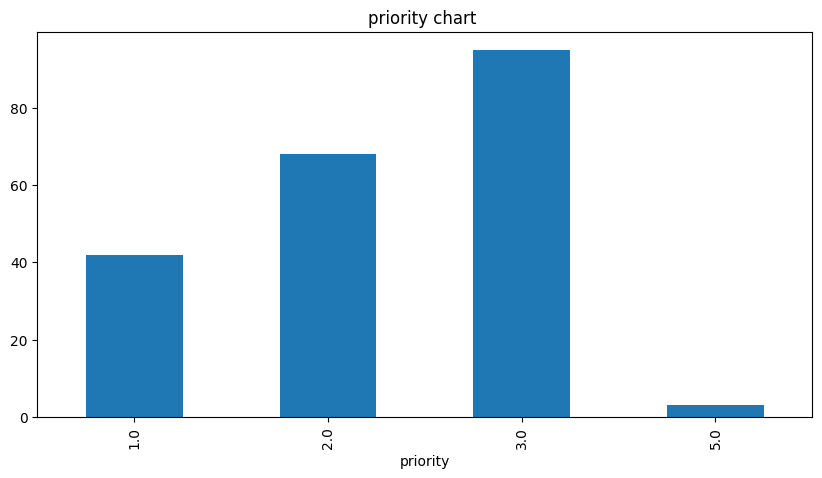

In [14]:
ax= df['priority'].value_counts().sort_index().plot(kind='bar',title='priority chart ',figsize=(10,5))
ax.set_xlabel('priority')
plt.show()

## Data_preparation

In [15]:
# Convert 'priority' to integer (assuming it's categorical with few unique values)
df['priority'] = df['priority'].astype(int)

In [16]:
# Combine 'subject' and 'Description' into a single text feature
df['text'] = df['subject'] + ' ' + df['Description']

In [17]:
# Define cleaning function
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [18]:
# Apply cleaning function
df['final_text'] = df['text'].apply(lambda x: get_clean(x))

In [19]:
df.head()

,priority,subject,Description,text,final_text
0,2,Wireless Mouse suddenly stops working,"Dear Support Team, I've been using the Wireles...",Wireless Mouse suddenly stops working Dear Sup...,wireless mouse suddenly stops working dear sup...
1,2,Problème de connexions IP PBX,"Bonjour, nous rencontrons un problème avec not...","Problème de connexions IP PBX Bonjour, nous re...",probleme de connexions ip pbx bonjour nous ren...
2,2,Problem mit meinem SFX-Netzteil,"Sehr geehrte Damen und Herren, mein SFX-Netzte...",Problem mit meinem SFX-Netzteil Sehr geehrte D...,problem mit meinem sfxnetzteil sehr geehrte da...
3,2,Invoice Adjustment Request,"Dear Customer Support,\nI recently received my...",Invoice Adjustment Request Dear Customer Suppo...,invoice adjustment request dear customer suppo...
4,2,Issue with Arbitrum: UI not loading,"Hello Support Team,\nI've been experiencing an...",Issue with Arbitrum: UI not loading Hello Supp...,issue with arbitrum ui not loading hello suppo...


In [20]:
# Transform text data using TF-IDF
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1, 3), analyzer='char')
X = tfidf.fit_transform(df['final_text'])
y = df['priority']

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# Apply SMOTE to balance the training data with k_neighbors set to 2
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [23]:
# Train the model
clf2 = LinearSVC(C=10, class_weight='balanced')
clf2.fit(X_train_res, y_train_res)

LinearSVC(C=10, class_weight='balanced')

In [24]:
# Predict and evaluate the model
y_pred2 = clf2.predict(X_test)
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           1       1.00      0.45      0.62        11
           2       0.47      0.70      0.56        10
           3       0.76      0.76      0.76        21
           5       0.00      0.00      0.00         0

    accuracy                           0.67        42
   macro avg       0.56      0.48      0.49        42
weighted avg       0.75      0.67      0.68        42



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Testing_example

In [25]:
# Function to clean new text data
def preprocess_text(text):
    text = get_clean(text)
    text_transformed = tfidf.transform([text])
    return text_transformed

In [26]:
# Function to predict the priority of new text data
def predict_priority(subject, description):
    text = subject + ' ' + description
    text_transformed = preprocess_text(text)
    prediction = clf2.predict(text_transformed)
    return prediction[0]

In [32]:
# Example
i=0
new_subject = df['subject'][i]
new_description = df['Description'][i]
print(f"Subject: {new_subject}")
print(f"Description: {new_description}")
predicted_priority = predict_priority(new_subject, new_description)
print(f"Actual priority: {df['priority'][i]}")

print(f"The predicted priority for the new text is: {predicted_priority}")

Subject: Wireless Mouse suddenly stops working
Description: Dear Support Team, I've been using the Wireless Mouse I purchased recently, and all of a sudden, it just stopped working. I've tried changing the batteries and reconnecting it, but nothing helps. Could you please provide a solution? Thanks, Jane Doe
Actual priority: 2
The predicted priority for the new text is: 2


## Model_saving

In [33]:
import joblib

# Save the trained model
joblib.dump(clf2, 'svm_priority_model.joblib')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']